# **Setup**

In [77]:
# Basic setup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)


# **1) Context**

ConnectWave Telecom is a growing telecommunications service provider with over 50,000 active customers across urban and semi-urban regions. Over the past year, the company has observed a steady increase in customer churn, especially among prepaid and short-term contract users.

Despite offering competitive pricing and bundled services, ConnectWave struggles to understand why customers leave and which users are most at risk. This uncertainty has resulted in ineffective retention campaigns, higher marketing costs, and declining customer loyalty.

The management team wants to introduce a data-driven monitoring system that can predict churn early and automatically notify the customer retention team through Slack.

# **2) Problem Statement**

You have been hired as a Data Scientist at ConnectWave Telecom to help the analytics team reduce customer churn.

Currently, the company identifies churn only after customers have already discontinued their services. This reactive approach leads to:

Loss of recurring revenue

Increased customer acquisition costs

Poor customer experience

Inefficient use of retention resources

Your responsibility is to build an end-to-end machine learning system that predicts which customers are likely to churn and sends automatic Slack notifications when high-risk customers are detected.

This system will allow the company to intervene early by offering personalized discounts, improved service plans, or loyalty benefits.

# **3) Objective**

Analyze customer behaviour and service usage patterns to identify major drivers of churn.

Build a predictive model to classify whether a customer is likely to churn.

Integrate Slack alerts to notify teams about high-risk customers.

Provide actionable insights to improve customer retention strategies.

# **4) Data Understanding**

In [78]:
df = pd.read_csv("/content/connectwave_customer_churn_dataset.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Basic checks

In [79]:
print("Shape:", df.shape)
df.info()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [80]:
df.describe(include="all").T.head(30)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Target distribution
df["Churn"].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869


In [82]:
(df["Churn"].value_counts(normalize=True)*100).round(2)


,proportion
Churn,
No,73.46
Yes,26.54


Observation:

The dataset contains customer demographics, service subscriptions, account details, and the churn label.

Initial target distribution shows whether churn is imbalanced, which affects evaluation strategy.

# **5) Exploratory Data Analysis (EDA)**

Missing values

In [83]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


,0


Visualizations

In [84]:
def churn_rate_by(col):
    tab = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    return tab.round(2)


Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


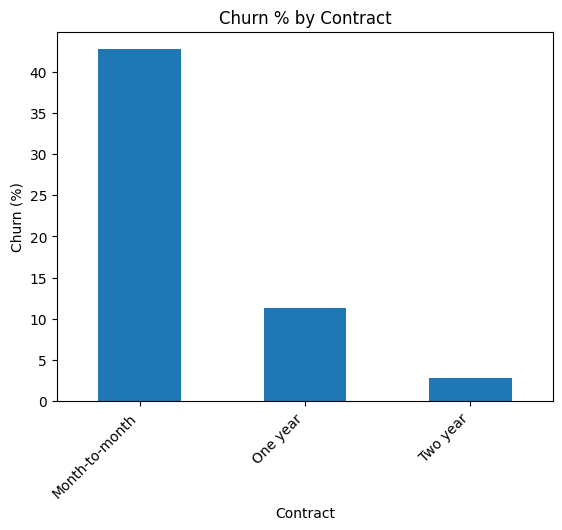

Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


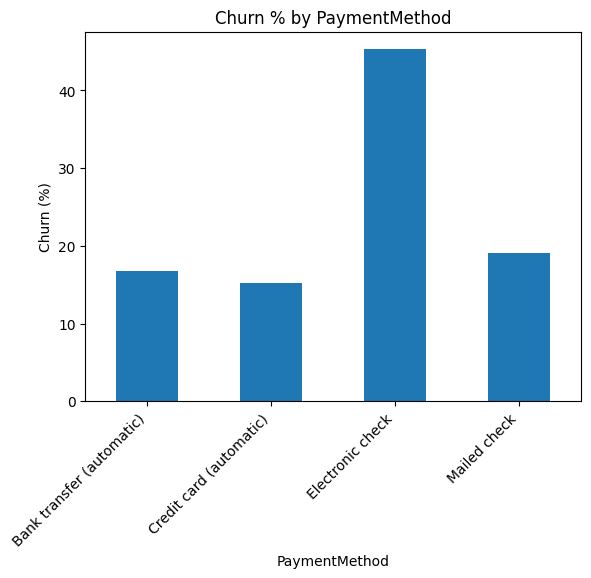

Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40


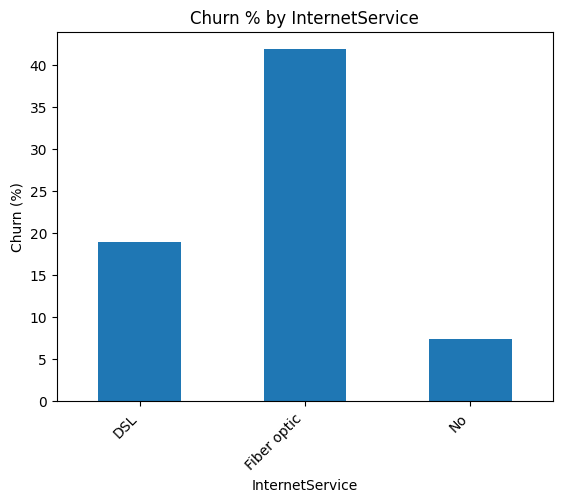

Churn                No    Yes
PaperlessBilling              
No                83.67  16.33
Yes               66.43  33.57


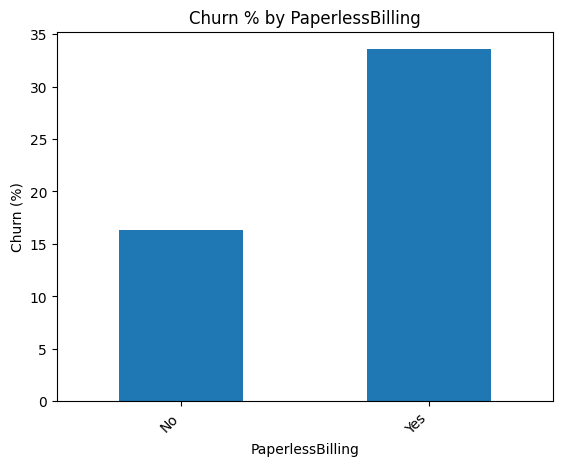

Churn             No    Yes
SeniorCitizen              
0              76.39  23.61
1              58.32  41.68


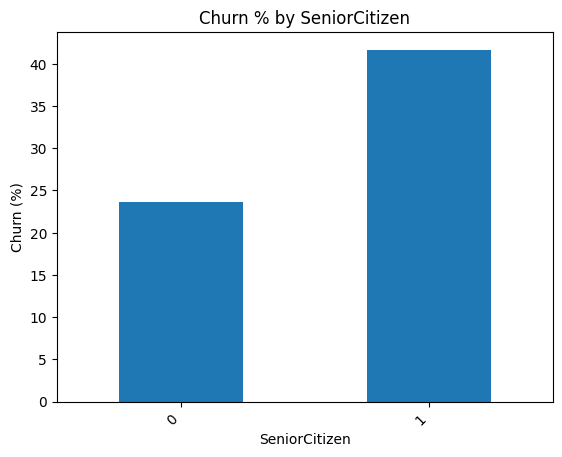

In [85]:
def safe_bar_churn(col):
    if col not in df.columns:
        print(f"Column not found: {col}")
        return
    rates = churn_rate_by(col)
    print(rates)

    # bar plot of churn% for each category
    churn_col = "Yes" if "Yes" in rates.columns else rates.columns[-1]
    rates[churn_col].plot(kind="bar")
    plt.title(f"Churn % by {col}")
    plt.ylabel("Churn (%)")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Try common churn drivers
for c in ["Contract", "PaymentMethod", "InternetService", "PaperlessBilling", "SeniorCitizen"]:
    safe_bar_churn(c)


Numeric features vs churn

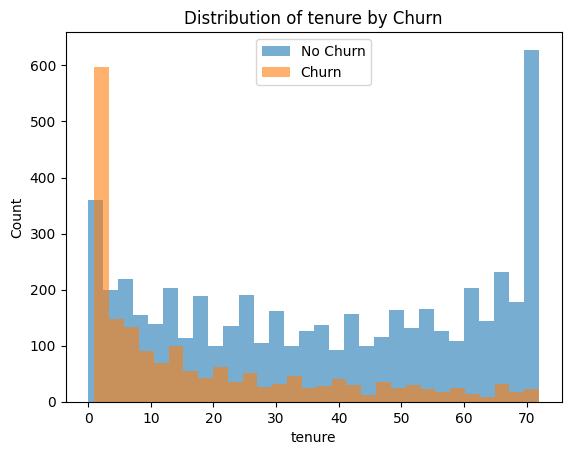

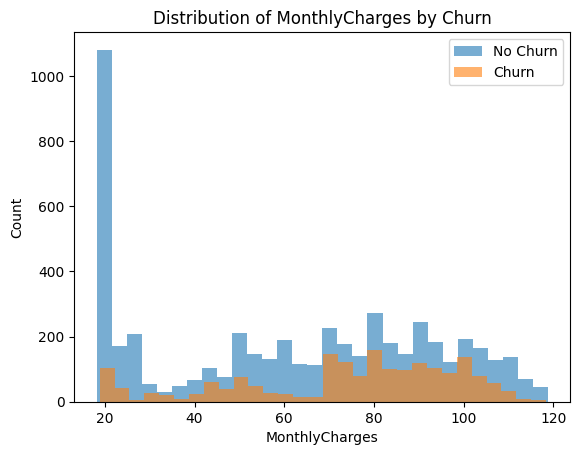

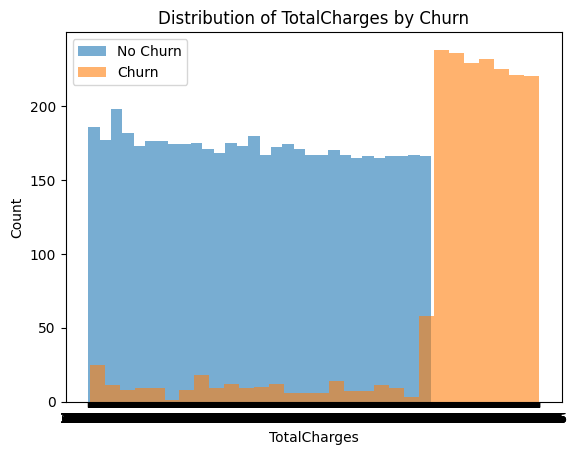

In [86]:
def safe_hist_by_churn(col):
    if col not in df.columns:
        print(f"Column not found: {col}")
        return

    # Split by churn
    yes_mask = df["Churn"].astype(str).str.lower().isin(["yes", "1", "true"])
    churn_yes = df[yes_mask][col]
    churn_no  = df[~yes_mask][col]

    plt.hist(churn_no.dropna(), bins=30, alpha=0.6, label="No Churn")
    plt.hist(churn_yes.dropna(), bins=30, alpha=0.6, label="Churn")
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

for c in ["tenure", "MonthlyCharges", "TotalCharges"]:
    safe_hist_by_churn(c)


EDA Findings:

Certain contract types and payment methods usually show higher churn rates.

Lower tenure customers often churn more frequently than long-tenure customers.

Charges-related variables may separate churn vs non-churn customers and should be handled carefully.

# **6) Data Preprocessing**

Fix TotalCharges if it’s stored as text

In [87]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("TotalCharges converted to numeric.")


TotalCharges converted to numeric.


In [88]:
# Convert churn labels to 0/1 safely (TARGET CLEANING STEP)
df["Churn"] = df["Churn"].str.lower().map({
    "yes": 1,
    "no": 0
})

df["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


In [89]:
# Keep customerID separately (needed later for Slack alerts)
customer_id_col = "customerID"   # <-- your dataset column name

# Store IDs safely
customer_ids = df[customer_id_col].copy()

# Remove ID column from modelling data (to avoid data leakage)
df_model = df.drop(columns=[customer_id_col])

print("Model df shape:", df_model.shape)


Model df shape: (7043, 20)


Observation:

Converted numeric-like columns (e.g., TotalCharges) to numeric to avoid model errors.

Removed ID columns from model features to prevent leakage while keeping them for alert reporting.

# **7) Feature Engineering**

In [90]:
df_fe = df_model.copy()

if "tenure" in df_fe.columns and "MonthlyCharges" in df_fe.columns:
    df_fe["ChargesPerTenure"] = df_fe["MonthlyCharges"] / (df_fe["tenure"].replace(0, np.nan))
    df_fe["ChargesPerTenure"] = df_fe["ChargesPerTenure"].fillna(0)

if "tenure" in df_fe.columns:
    df_fe["TenureGroup"] = pd.cut(
        df_fe["tenure"],
        bins=[-1, 6, 12, 24, 48, 72, 1e9],
        labels=["0-6","6-12","12-24","24-48","48-72","72+"]
    )

df_fe.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargesPerTenure,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.850,0-6
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1.675,24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,26.925,0-6
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.940,24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,35.350,0-6


Feature Engineering Findings:

Created behavior-based features such as charges-per-tenure to capture usage intensity.

Tenure groups simplify patterns (new vs long-term customers) and often improve interpretability.

# **8) Experiment Design**

Experiment Design:
We will follow a supervised binary classification approach with Churn as the target.

Split data into train/test sets to evaluate generalization.

Build a baseline Logistic Regression model for interpretability and a Random Forest model for non-linear patterns.

Use metrics beyond accuracy (Precision, Recall, F1, ROC-AUC) due to possible class imbalance.

Tune classification threshold to prioritize Recall for churners (missing a churner is costlier than flagging a non-churner).

# **9) Data Preparation (Encoding + Scaling Pipeline)**

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Target
# Target already cleaned in preprocessing
y_bin = df_fe["Churn"]

X = df_fe.drop(columns=["Churn"])

# Identify numeric/categorical
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numeric:", len(num_cols), "Categorical:", len(cat_cols))

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Numeric: 5 Categorical: 16
Train: (5634, 21) Test: (1409, 21)


Observation:

Used One-Hot Encoding for categorical variables and scaling for numeric features.

Stratified split preserves churn ratio in train/test sets for fair evaluation.

# **10) Data Modelling**

Logistic Regression (Baseline)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Update the preprocessing pipeline to include imputation for numeric columns
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

log_reg = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=2000))
])

log_reg.fit(X_train, y_train)

pred_lr = log_reg.predict(X_test)
proba_lr = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, proba_lr).round(4))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC-AUC: 0.8473


Random Forest (Non-linear)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"  # helps if churn is minority
    ))
])

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, proba_rf).round(4))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.824


Observation:

Logistic Regression provides a strong interpretable baseline.

Random Forest captures non-linear relationships and often improves recall/ROC-AUC.

# **11) Model Evaluation**

Confusion matrix + ROC curve

Logistic Regression 
Confusion Matrix:
 [[939  96]
 [179 195]]


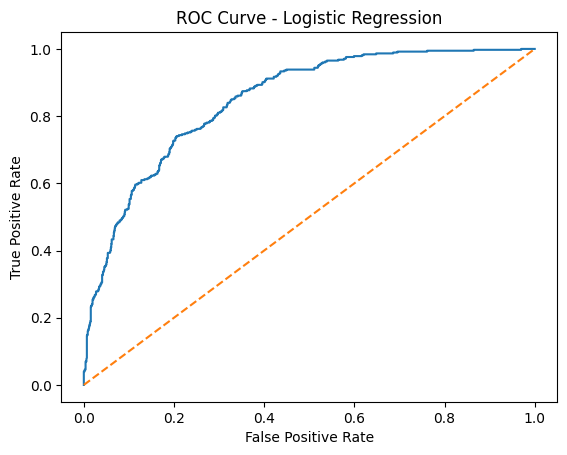

Random Forest 
Confusion Matrix:
 [[929 106]
 [192 182]]


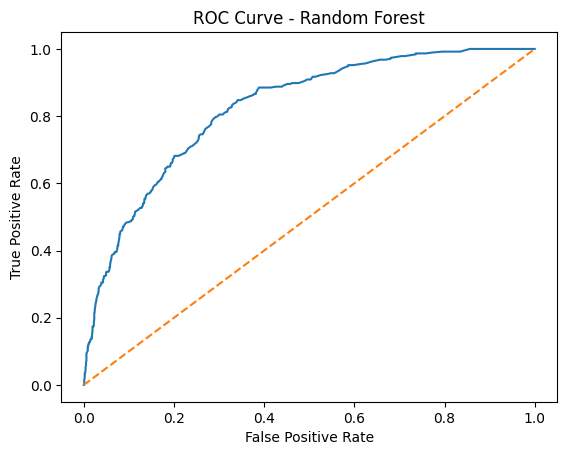

In [94]:
def show_eval(y_true, y_pred, y_prob, title="Model"):
    cm = confusion_matrix(y_true, y_pred)
    print(title, "\nConfusion Matrix:\n", cm)

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], linestyle="--")
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

show_eval(y_test, pred_lr, proba_lr, "Logistic Regression")
show_eval(y_test, pred_rf, proba_rf, "Random Forest")


Threshold tuning (business-friendly)

In [95]:
def predict_with_threshold(probs, thr=0.5):
    return (probs >= thr).astype(int)

for thr in [0.3, 0.4, 0.5]:
    pred_thr = predict_with_threshold(proba_rf, thr)
    print("\nThreshold:", thr)
    print(classification_report(y_test, pred_thr))



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.60      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78   

Evaluation Findings:

Accuracy alone is not sufficient; recall for churners is critical.

Lowering the threshold can increase churn recall, at the cost of more false positives.

The best threshold depends on retention team capacity and cost of outreach.

# **12) Model Explainability**

Permutation Importance (works with pipeline)

In [96]:
from sklearn.inspection import permutation_importance

# Use a smaller sample for speed in Colab
X_test_sample = X_test.copy()
y_test_sample = y_test.copy()

result = permutation_importance(
    rf, X_test_sample, y_test_sample,
    n_repeats=5, random_state=42, scoring="roc_auc"
)

importances = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)
importances.head(15)


,0
Contract,0.042145
ChargesPerTenure,0.013707
InternetService,0.005616
OnlineSecurity,0.003955
PaperlessBilling,0.000444
Partner,0.000229
SeniorCitizen,0.000078
TechSupport,-0.000044
PhoneService,-0.000077
PaymentMethod,-0.000254


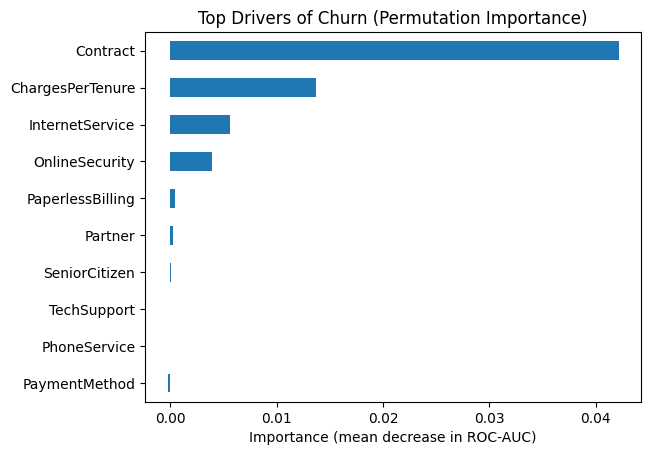

In [97]:
# Plot top features (from original columns - high-level)
top = importances.head(10)[::-1]
top.plot(kind="barh")
plt.title("Top Drivers of Churn (Permutation Importance)")
plt.xlabel("Importance (mean decrease in ROC-AUC)")
plt.show()


Explainability Findings:

The model highlights a small set of strong churn drivers (e.g., contract type, tenure, charges, specific service subscriptions).

These drivers can be directly translated into targeted retention actions.

# **13) Recommendations**

Target short-tenure customers: New customers have higher chances of leaving. Provide boarding assistance and initial loyalty benefits within the first 1-6 months.

Enhance contract conversion: When month to month user base is churning more, provide incentives to switch to longer term contracts-discounts or better packages.

Review pricing/charges affect: Churn: When increased monthly rates result in churn, provide customized bundles or bill-shock insurance and flexible plans.

Retention based on service services: In case the absence of add-ons (security, backup, support) is correlated with churn, develop special cross-sell retention packages.

Optimization of payment methods: When some of your payment methods are producing greater churn, promote autopay through discounts and easier billing experience.

Operation strategy: The model should be used on a weekly basis to come up with a high-risk list and allocate the cases to the retention agents according to the risk score.

In [105]:
from google.colab import userdata

SLACK_WEBHOOK_URL = userdata.get("SLACK_WEBHOOK_URL")

print("Webhook loaded:", SLACK_WEBHOOK_URL is not None)


Webhook loaded: True


In [98]:
import requests

# Choose best model
best_model = rf
best_probs = best_model.predict_proba(X)[:, 1]

# Add risk score to original df for reporting
df_alert = df.copy()
df_alert["churn_risk_score"] = best_probs

# Define threshold for "high risk"
RISK_THRESHOLD = 0.70
high_risk = df_alert[df_alert["churn_risk_score"] >= RISK_THRESHOLD].sort_values("churn_risk_score", ascending=False)

print("High risk count:", high_risk.shape[0])
high_risk.head()


High risk count: 1404


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_risk_score
3301,2636-ALXXZ,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,1,1.0
3426,4510-HIMLV,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,69.80,1,1.0
6764,7660-HDPJV,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.20,1,1.0
970,7294-TMAOP,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,90.55,90.55,1,1.0
976,5875-YPQFJ,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,1,1.0


In [106]:
def send_slack_message(text):
    if not SLACK_WEBHOOK_URL or "PASTE_YOUR_WEBHOOK_HERE" in SLACK_WEBHOOK_URL:
        print(" Slack webhook URL not set.")
        return

    payload = {"text": text}
    r = requests.post(SLACK_WEBHOOK_URL, json=payload)
    print("Slack status:", r.status_code, r.text[:200])

# Send top 5 alerts
top_n = min(5, high_risk.shape[0])

for i in range(top_n):
    row = high_risk.iloc[i]

    # Use CustomerID if present
    cust_id = row[customer_id_col] if customer_id_col and customer_id_col in high_risk.columns else f"customer_{i+1}"

    msg = (
        f" *Churn Risk Alert*\n"
        f"• Customer: `{cust_id}`\n"
        f"• Risk Score: *{row['churn_risk_score']:.2f}*\n"
        f"• Suggested Action: Offer retention bundle / contract upgrade / discount\n"
    )
    send_slack_message(msg)


Slack status: 200 ok
Slack status: 200 ok
Slack status: 200 ok
Slack status: 200 ok
Slack status: 200 ok
